In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ccxt

In [2]:
model = joblib.load('buy_model')

In [3]:
# Load data
binance = ccxt.binance({
    'options': {
        'defaultType': 'future',
}
})

# Get data
data = binance.fetch_ohlcv('ADA/USDT', '5m', limit=100)
df = pd.DataFrame(data, columns=['time', 'open', 'high', 'low', 'close', 'volume'])
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('time', inplace=True)

# Create features
df['high-low'] = df['high'] - df['low']
df['rsi'] = df['close'].rolling(14).apply(lambda x: pd.Series(x).value_counts().index[0])
df['rsi'] = df['rsi'].apply(lambda x: 100 - 100 / (1 + x))

df.dropna(inplace=True)

df

,open,high,low,close,volume,high-low,rsi
time,,,,,,,
2022-10-05 02:35:00,0.4336,0.4337,0.4334,0.4335,613532.0,0.0003,30.240670
2022-10-05 02:40:00,0.4336,0.4336,0.4330,0.4330,796373.0,0.0006,30.245536
2022-10-05 02:45:00,0.4331,0.4331,0.4323,0.4326,2274522.0,0.0008,30.245536
2022-10-05 02:50:00,0.4325,0.4327,0.4323,0.4324,569958.0,0.0004,30.264993
2022-10-05 02:55:00,0.4325,0.4326,0.4322,0.4325,1340932.0,0.0004,30.269856
...,...,...,...,...,...,...,...
2022-10-05 09:25:00,0.4283,0.4285,0.4279,0.4283,1008010.0,0.0006,29.996500
2022-10-05 09:30:00,0.4284,0.4290,0.4283,0.4289,1304816.0,0.0007,29.996500
2022-10-05 09:35:00,0.4289,0.4289,0.4285,0.4286,594766.0,0.0004,29.996500


In [4]:
result = model.predict(df)

In [5]:


buy_single = np.where(result == 1,df['close'],np.nan)
sell_single = np.where(result == -1,df['close'],np.nan)


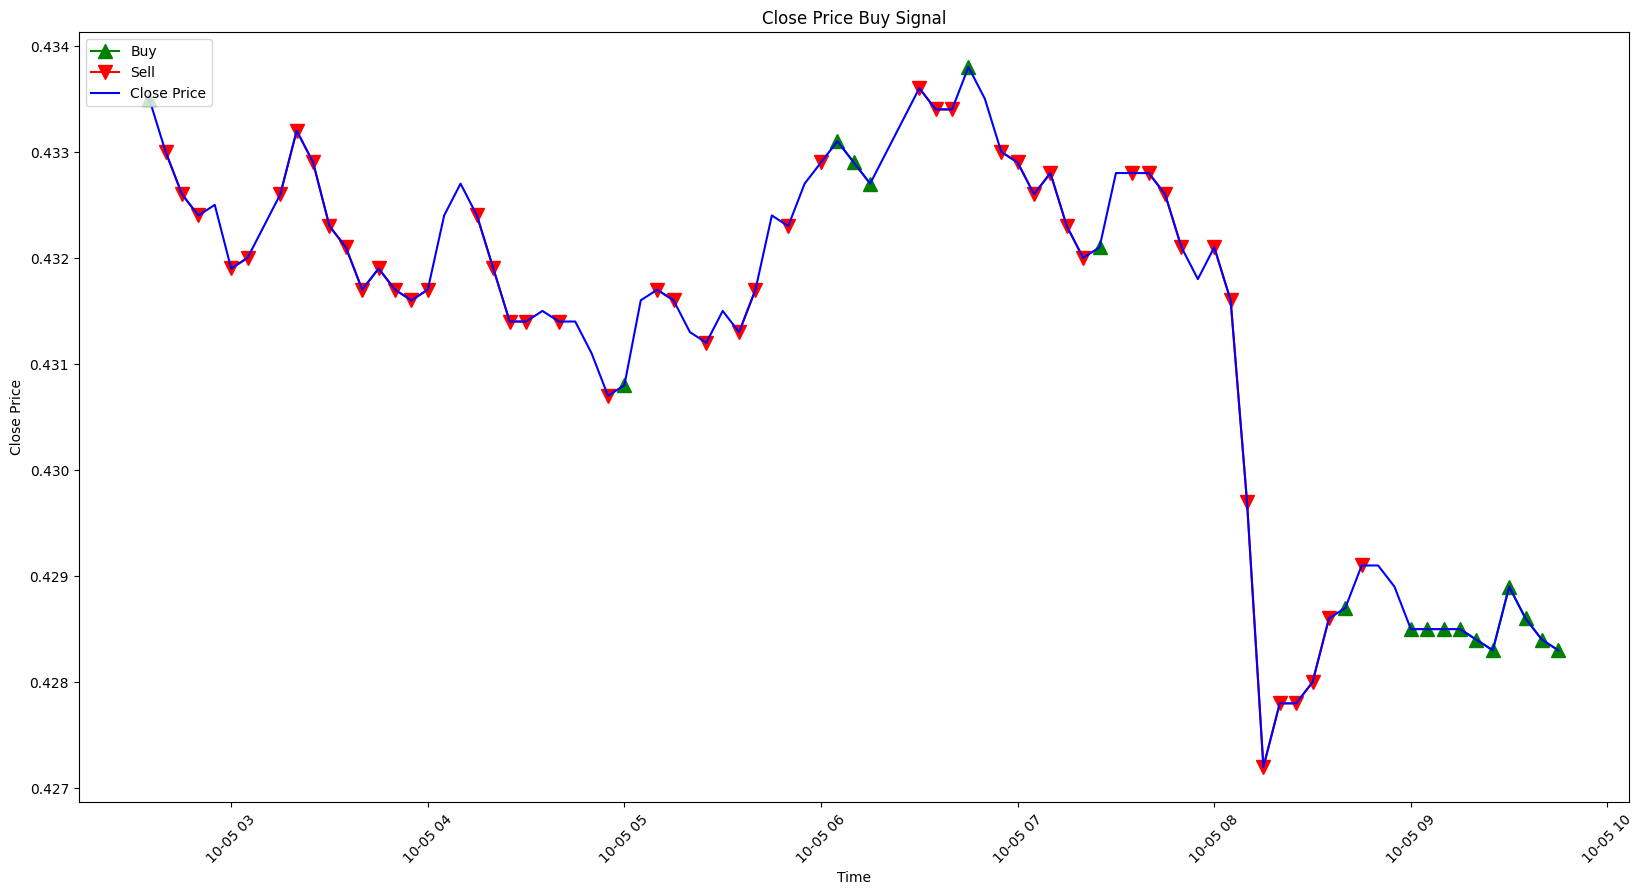

In [6]:
#visualize the result
plt.figure(figsize=(20,10))
plt.plot(df.index, buy_single, color='green', label='Buy', marker='^', markersize=10)
plt.plot(df.index, sell_single, color='red', label='Sell', marker='v', markersize=10)
plt.plot(df.index, df['close'], color='blue', label='Close Price')
plt.xticks(rotation=45)
plt.title('Close Price Buy Signal')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.savefig('model_result.png')
plt.show()

In [7]:
#save the result
df['buy'] = buy_single
df['sell'] = sell_single
df.to_csv('../data/buy_result.csv')